## Generating Bar+Jitter plot using VOG Baseline data

### Loading Packages that we are going to use in this analysis 

**ggplot** and **ggpubr** are used for visualizing our data. **tidyverse** is a specialized package for managing data-set. **Rmisc** is used for calculating descriptive statistics.


In [2]:
library(ggplot2)
library(tidyverse)
library(Rmisc)
library(ggpubr)


### Import dataset
First, it is necessary to import a dataset from the clipboard. After importing, we will give new column names to the data set and convert two attributes as a factor.   


In [3]:
Gain.table <- read.delim("clipboard", header= F)
colnames(Gain.table) <- c("AnimalID", "Gain", "Genotype", "Freq")
Gain.table$Freq <- factor(Gain.table$Freq, levels=c(0.1, 0.25, 0.5, 1.0), order=T)
Gain.table$Genotype <- factor(Gain.table$Genotype, levels=c("WT", "Het"), order=T)
Gain.table$FreqGenotype <- interaction(Gain.table$Freq, Gain.table$Genotype)
head(Gain.table)


,AnimalID,Gain,Genotype,Freq,FreqGenotype
,<fct>,<dbl>,<ord>,<ord>,<fct>
1,BS_585_WT,0.238,WT,0.1,0.1.WT
2,BS_586_WT,0.075,WT,0.1,0.1.WT
3,BS_590_WT,0.243,WT,0.1,0.1.WT
4,BS_310_WT,0.267,WT,0.1,0.1.WT
5,BS_311_WT,0.150,WT,0.1,0.1.WT
6,BS_312_WT,0.275,WT,0.1,0.1.WT


### Summarize the dataset



In [4]:
Gain.table.s <- summarySE(Gain.table, measurevar = "Gain", groupvars = c("Freq", "Genotype"))
Gain.table.s


Freq,Genotype,N,Gain,sd,se,ci
<ord>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1,WT,19,0.2414211,0.08801472,0.02019196,0.04242174
0.1,Het,15,0.2500667,0.06972340,0.01800250,0.03861153
0.25,WT,19,0.3544211,0.10703131,0.02455467,0.05158744
0.25,Het,15,0.3389333,0.07999327,0.02065417,0.04429880
0.5,WT,19,0.5814211,0.10595928,0.02430873,0.05107074
0.5,Het,15,0.5608000,0.08518400,0.02199441,0.04717333
1,WT,19,0.7242105,0.11174553,0.02563618,0.05385962
1,Het,15,0.7150000,0.07056810,0.01822061,0.03907931


### Generate Bar plot
Stimulus frequency should be converted from numeric value to factor.


In [5]:
Gain.table.s2 <- Gain.table.s
Gain.table.s2$Freq <- factor(Gain.table.s$Freq)
Gain.table.s2


Freq,Genotype,N,Gain,sd,se,ci
<ord>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1,WT,19,0.2414211,0.08801472,0.02019196,0.04242174
0.1,Het,15,0.2500667,0.06972340,0.01800250,0.03861153
0.25,WT,19,0.3544211,0.10703131,0.02455467,0.05158744
0.25,Het,15,0.3389333,0.07999327,0.02065417,0.04429880
0.5,WT,19,0.5814211,0.10595928,0.02430873,0.05107074
0.5,Het,15,0.5608000,0.08518400,0.02199441,0.04717333
1,WT,19,0.7242105,0.11174553,0.02563618,0.05385962
1,Het,15,0.7150000,0.07056810,0.01822061,0.03907931



### Generate simple barplot (mean+sem)


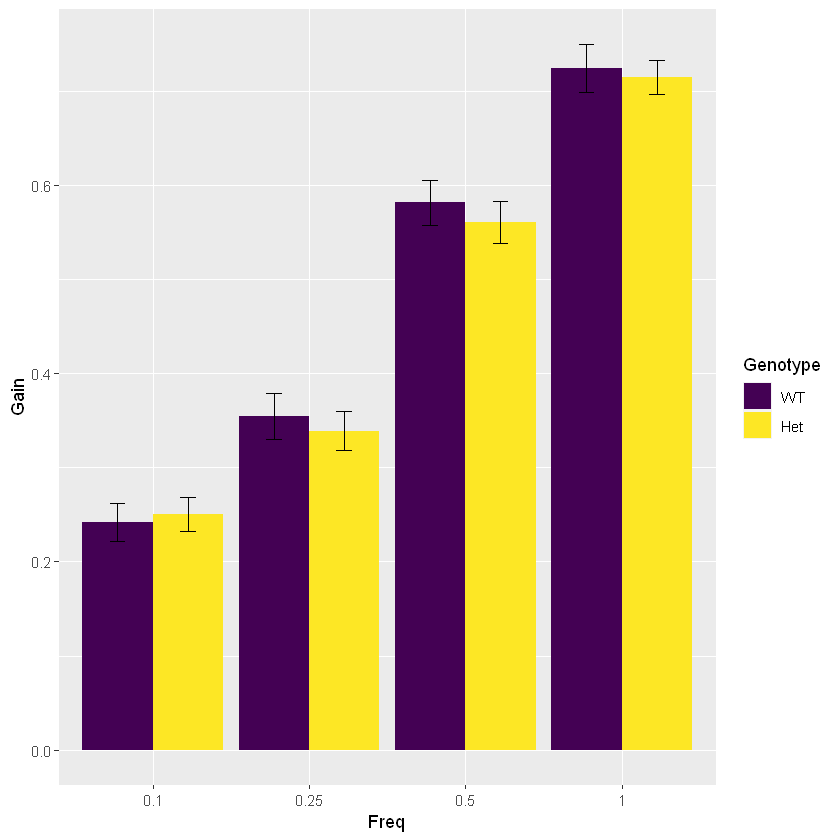

In [6]:
bar <- ggplot(Gain.table.s2, aes(x=Freq, y=Gain, fill=Genotype))
bar + geom_bar(stat="identity", 
               position="dodge")+ 
  geom_errorbar(aes(ymin=Gain-se, ymax=Gain+se), 
                width=0.2, 
                position=position_dodge(0.9))



### Generate boxplot+dotplot


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



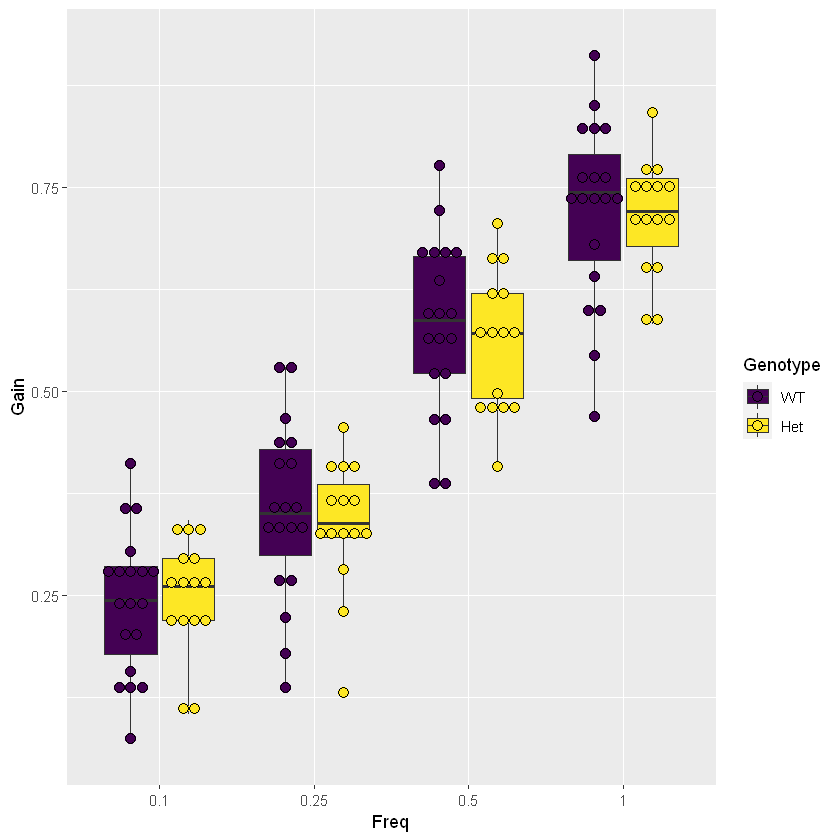

In [7]:
ggplot(aes(y=Gain, x=Freq, fill=Genotype), data=Gain.table)+ 
  geom_boxplot() + 
  geom_dotplot(binaxis='y', 
               stackdir='center', 
               dotsize=.5, 
               position=position_dodge(0.75))


### Generate barplot+Jitterplot


In [8]:
p <- ggbarplot(Gain.table, 
          x="Freq", 
          y="Gain",
          xlab="Frequency (Hz)",
          ylab="Gain",
          ylim=c(0,1.0),
          width = 0.7,
          add = c("mean_se", "jitter"), 
          color="Genotype",
          palette=c("blue", "red"),
          position = position_dodge(0.8))


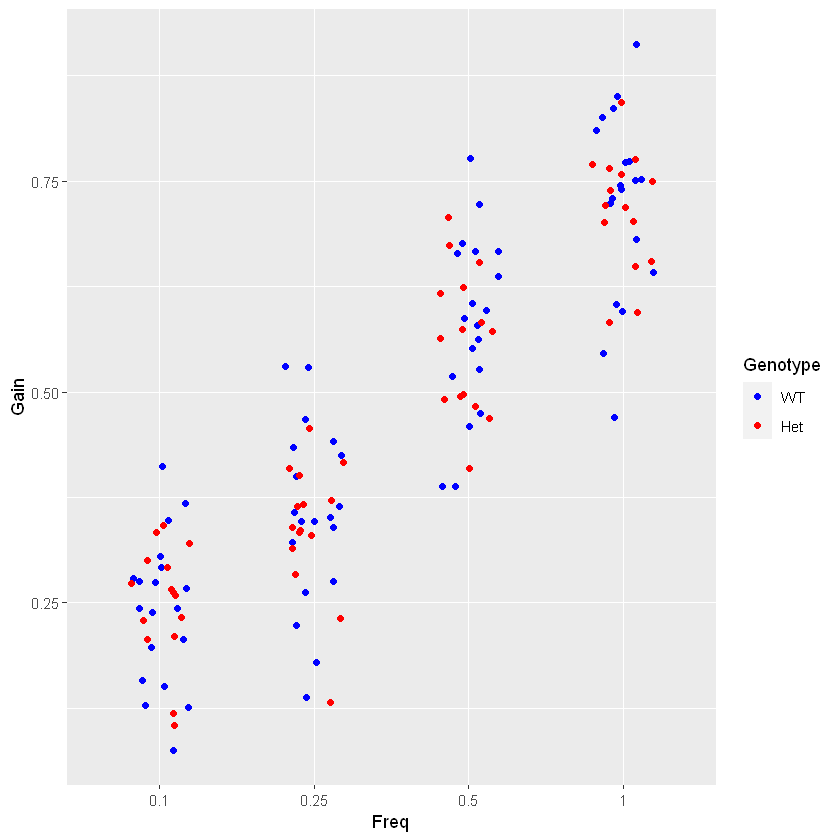

In [9]:
ggplot(Gain.table, 
       aes(x=Freq, y=Gain)) + 
  geom_jitter(aes(color=Genotype),
              position=position_jitter(0.2)) +
  scale_color_manual(values=c("blue", "red"))



### Perform hypothesis testing


In [10]:
compare_means(Gain~Genotype, group.by="Freq", data=Gain.table, method="t.test")



Freq,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<ord>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
0.1,Gain,WT,Het,0.7513539,1,0.75,ns,T-test
0.25,Gain,WT,Het,0.6326085,1,0.63,ns,T-test
0.5,Gain,WT,Het,0.5337953,1,0.53,ns,T-test
1,Gain,WT,Het,0.7716088,1,0.77,ns,T-test


### Add p-values and significance levels


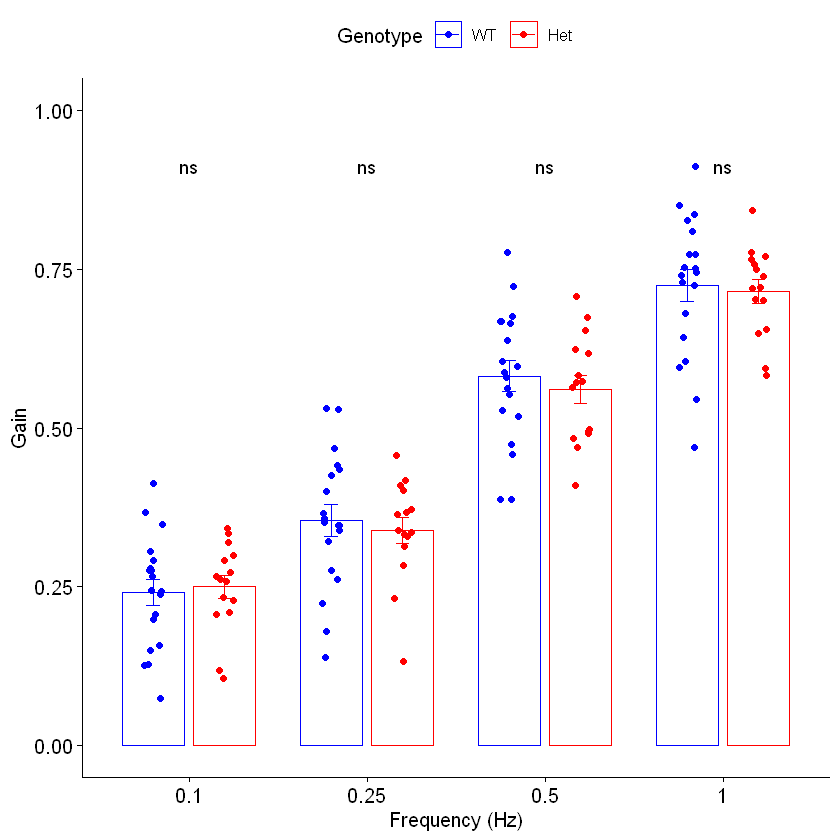

In [11]:
p + stat_compare_means(aes(group=Genotype), label="p.signif")

